In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\ansla\\OneDrive\\Desktop\\EDUNET\\SHELL\\dataset.csv")  
df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.21,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.97,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [4]:
df.replace("..", pd.NA, inplace=True)
year_cols = df.columns[6:]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')
df[year_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    4854 non-null   float64
 1   1991    3497 non-null   float64
 2   1992    3653 non-null   float64
 3   1993    3717 non-null   float64
 4   1994    3779 non-null   float64
 5   1995    4672 non-null   float64
 6   1996    3804 non-null   float64
 7   1997    3767 non-null   float64
 8   1998    3818 non-null   float64
 9   1999    4005 non-null   float64
 10  2000    5496 non-null   float64
 11  2001    4018 non-null   float64
 12  2002    4057 non-null   float64
 13  2003    4043 non-null   float64
 14  2004    4225 non-null   float64
 15  2005    5084 non-null   float64
 16  2006    4236 non-null   float64
 17  2007    4248 non-null   float64
 18  2008    4603 non-null   float64
 19  2009    3761 non-null   float64
 20  2010    2332 non-null   float64
 21  2011    658 non-null    float64
dty

In [5]:
df_melted = df.melt(
    id_vars=['Country name', 'Series name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)
df_melted.head()

,Country name,Series name,Year,Value
0,Aruba,Land area below 5m (% of land area),1990,29.57
1,Andorra,Land area below 5m (% of land area),1990,0.00
2,Afghanistan,Land area below 5m (% of land area),1990,0.00
3,Angola,Land area below 5m (% of land area),1990,0.21
4,Albania,Land area below 5m (% of land area),1990,4.97


In [6]:
df_pivot = df_melted.pivot_table(
    index=['Country name', 'Year'],
    columns='Series name',
    values='Value'
).reset_index()
df_pivot.head()

Series name,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Afghanistan,1990,NaN,NaN,NaN,NaN,NaN,NaN,0.14,NaN,...,0.0,2.08,6.74,NaN,NaN,NaN,NaN,208.7,3481333.07,3.49
1,Afghanistan,1991,NaN,NaN,NaN,NaN,NaN,NaN,0.13,NaN,...,NaN,3.39,7.04,NaN,NaN,NaN,53.93,197.6,3658398.71,4.96
2,Afghanistan,1992,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,...,NaN,3.39,7.39,NaN,NaN,NaN,NaN,186.9,3843470.05,4.94
3,Afghanistan,1993,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,...,NaN,3.39,7.32,NaN,28.5,NaN,35.78,176.0,4036886.42,4.91
4,Afghanistan,1994,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,...,NaN,3.39,7.26,NaN,NaN,NaN,42.53,167.7,4239000.99,4.89


In [7]:
df_cleaned = df_pivot.dropna(thresh=int(df_pivot.shape[1] * 0.7))
df_cleaned.shape

(5, 50)

In [8]:
df_cleaned.to_csv("cleaned_data.csv", index=False)
print("Cleaned data saved as 'cleaned_data.csv'")


Cleaned data saved as 'cleaned_data.csv'


In [9]:
co2_series = df['Series name'].unique()
[series for series in co2_series if 'CO2' in series.upper()]

['CO2 emissions, total (KtCO2)',
 'CO2 emissions per capita (metric tons)',
 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
 'Other GHG emissions, total (KtCO2e)',
 'Methane (CH4) emissions, total (KtCO2e)',
 'Nitrous oxide (N2O) emissions, total (KtCO2e)',
 'GHG net emissions/removals by LUCF (MtCO2e)']

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\ansla\\OneDrive\\Desktop\\EDUNET\\SHELL\\cleaned_data.csv")
print("Dataset Loaded. Shape:", df.shape)
df.head()

Dataset Loaded. Shape: (5, 50)


,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Brazil,2000,NaN,75.0,93.0,NaN,1.09,NaN,1.89,239.30,...,4.88,1.44,37.13,NaN,107.75,NaN,102.86,35.7,1.416334e+08,2.28
1,Colombia,2000,NaN,72.0,91.0,NaN,0.60,NaN,1.46,220.08,...,2.00,1.68,33.74,16.64,95.17,NaN,103.71,26.8,2.866996e+07,2.12
2,Dominican Republic,2000,NaN,79.0,87.0,NaN,16.60,NaN,2.34,404.73,...,2.98,1.57,21.10,4.41,75.50,NaN,104.25,40.6,5.361387e+06,3.05
3,India,2005,NaN,28.0,85.0,32.92,NaN,NaN,1.29,560.58,...,NaN,1.37,12.23,41.64,85.30,3.7,90.16,73.2,3.141453e+08,2.07
4,Poland,2000,NaN,90.0,100.0,NaN,24.46,NaN,7.85,667.52,...,2.49,-0.53,4.33,0.14,95.23,NaN,98.27,9.6,2.372597e+07,-0.46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 50 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country name                                                      5 non-null      object 
 1   Year                                                              5 non-null      int64  
 2   Access to electricity (% of total population)                     0 non-null      float64
 3   Access to improved sanitation (% of total pop.)                   5 non-null      float64
 4   Access to improved water source (% of total pop.)                 5 non-null      float64
 5   Agricultural land under irrigation (% of total ag. land)          1 non-null      float64
 6   Annual freshwater withdrawals (% of internal resources)           4 non-null      float64
 7   Average annual precipitation (1961-1990

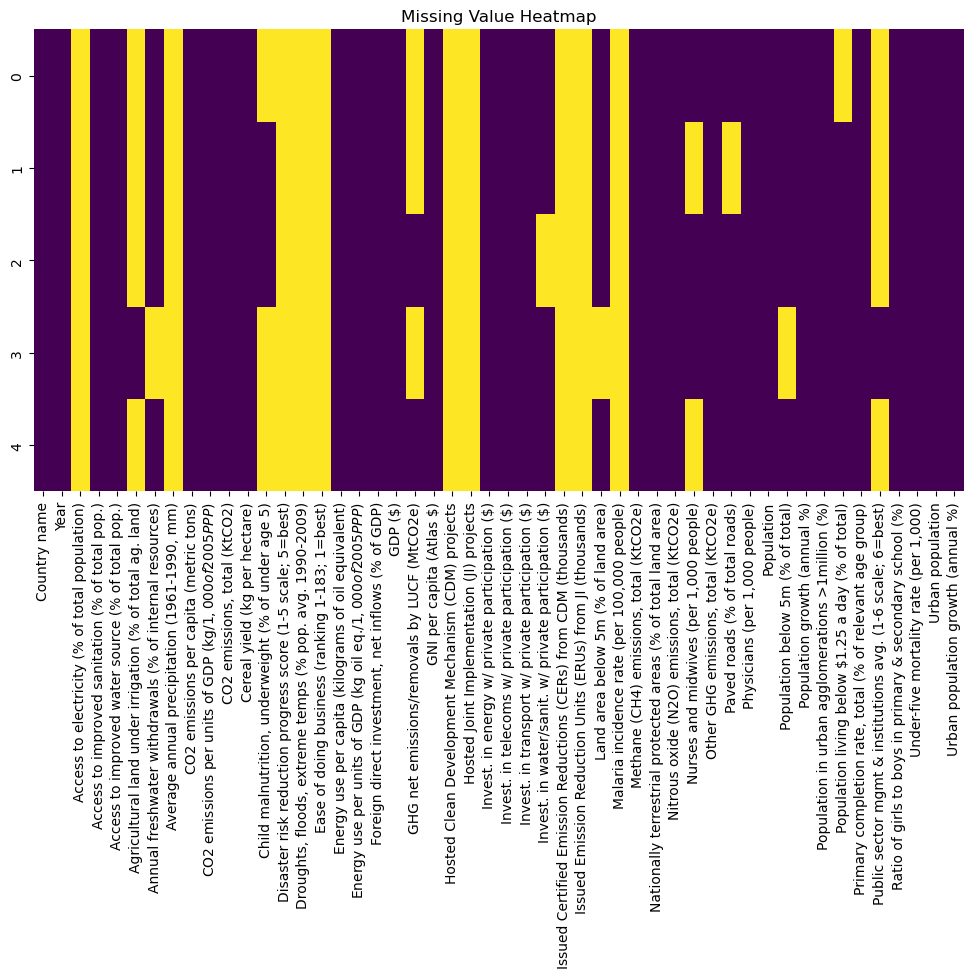

In [19]:
df.info()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


In [22]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [24]:
df_model = df.drop(columns=['Country name'])
df_model.dtypes

Year                                                                  int64
Access to electricity (% of total population)                       float64
Access to improved sanitation (% of total pop.)                     float64
Access to improved water source (% of total pop.)                   float64
Agricultural land under irrigation (% of total ag. land)            float64
Annual freshwater withdrawals (% of internal resources)             float64
Average annual precipitation (1961-1990, mm)                        float64
CO2 emissions per capita (metric tons)                              float64
CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)            float64
CO2 emissions, total (KtCO2)                                        float64
Cereal yield (kg per hectare)                                       float64
Child malnutrition, underweight (% of under age 5)                  float64
Disaster risk reduction progress score (1-5 scale; 5=best)          float64
Droughts, fl

In [25]:
co2_columns = [col for col in df_model.columns if 'CO2' in col.upper()]
print("CO₂-related columns:", co2_columns)
target_column = co2_columns[0]  

CO₂-related columns: ['CO2 emissions per capita (metric tons)', 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)', 'CO2 emissions, total (KtCO2)', 'GHG net emissions/removals by LUCF (MtCO2e)', 'Methane (CH4) emissions, total (KtCO2e)', 'Nitrous oxide (N2O) emissions, total (KtCO2e)', 'Other GHG emissions, total (KtCO2e)']


In [26]:
df_model = df_model.dropna(subset=[target_column])
print("After dropping missing target values:", df_model.shape)

After dropping missing target values: (5, 49)


In [27]:
X = df_model.drop(columns=[target_column, 'Year']) 
y = df_model[target_column]

In [29]:
X = X.fillna(X.mean())
print("Any nulls left in features?", X.isnull().values.any())

Any nulls left in features? True


In [32]:
import pandas as pd

df_cleaned = pd.read_csv("C:\\Users\\ansla\\OneDrive\\Desktop\\EDUNET\\SHELL\\cleaned_data.csv")
df_cleaned.head(100)  


,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Brazil,2000,NaN,75.0,93.0,NaN,1.09,NaN,1.89,239.30,...,4.88,1.44,37.13,NaN,107.75,NaN,102.86,35.7,1.416334e+08,2.28
1,Colombia,2000,NaN,72.0,91.0,NaN,0.60,NaN,1.46,220.08,...,2.00,1.68,33.74,16.64,95.17,NaN,103.71,26.8,2.866996e+07,2.12
2,Dominican Republic,2000,NaN,79.0,87.0,NaN,16.60,NaN,2.34,404.73,...,2.98,1.57,21.10,4.41,75.50,NaN,104.25,40.6,5.361387e+06,3.05
3,India,2005,NaN,28.0,85.0,32.92,NaN,NaN,1.29,560.58,...,NaN,1.37,12.23,41.64,85.30,3.7,90.16,73.2,3.141453e+08,2.07
4,Poland,2000,NaN,90.0,100.0,NaN,24.46,NaN,7.85,667.52,...,2.49,-0.53,4.33,0.14,95.23,NaN,98.27,9.6,2.372597e+07,-0.46


In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_cleaned

,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","CO2 emissions, total (KtCO2)",Cereal yield (kg per hectare),"Child malnutrition, underweight (% of under age 5)",Disaster risk reduction progress score (1-5 scale; 5=best),"Droughts, floods, extreme temps (% pop. avg. 1990-2009)",Ease of doing business (ranking 1-183; 1=best),Energy use per capita (kilograms of oil equivalent),"Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)","Foreign direct investment, net inflows (% of GDP)",GDP ($),GHG net emissions/removals by LUCF (MtCO2e),GNI per capita (Atlas $),Hosted Clean Development Mechanism (CDM) projects,Hosted Joint Implementation (JI) projects,Invest. in energy w/ private participation ($),Invest. in telecoms w/ private participation ($),Invest. in transport w/ private participation ($),Invest. in water/sanit. w/ private participation ($),Issued Certified Emission Reductions (CERs) from CDM (thousands),Issued Emission Reduction Units (ERUs) from JI (thousands),Land area below 5m (% of land area),"Malaria incidence rate (per 100,000 people)","Methane (CH4) emissions, total (KtCO2e)",Nationally terrestrial protected areas (% of total land area),"Nitrous oxide (N2O) emissions, total (KtCO2e)","Nurses and midwives (per 1,000 people)","Other GHG emissions, total (KtCO2e)",Paved roads (% of total roads),"Physicians (per 1,000 people)",Population,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Brazil,2000,NaN,75.0,93.0,NaN,1.09,NaN,1.89,239.30,330125.34,2661.3,NaN,NaN,NaN,NaN,1084.48,137.12,5.08,6.447018e+11,NaN,3860.0,NaN,NaN,8.587690e+09,1.010720e+10,1.373000e+09,711280000.0,NaN,NaN,1.21,NaN,345192.9,18.71,166811.2,3.84,7621.1,5.50,1.15,1.744254e+08,4.88,1.44,37.13,NaN,107.75,NaN,102.86,35.7,1.416334e+08,2.28
1,Colombia,2000,NaN,72.0,91.0,NaN,0.60,NaN,1.46,220.08,57923.93,3646.0,4.9,NaN,NaN,NaN,673.56,101.76,2.43,1.003638e+11,NaN,2350.0,NaN,NaN,8.190000e+07,1.105000e+08,1.047700e+09,42000000.0,NaN,NaN,0.94,NaN,55555.2,20.40,20912.0,NaN,28.4,NaN,1.32,3.976417e+07,2.00,1.68,33.74,16.64,95.17,NaN,103.71,26.8,2.866996e+07,2.12
2,Dominican Republic,2000,NaN,79.0,87.0,NaN,16.60,NaN,2.34,404.73,20117.16,4138.7,3.5,NaN,NaN,NaN,908.34,157.02,3.97,2.399666e+10,-18.794100,2620.0,NaN,NaN,5.773000e+08,0.000000e+00,4.989000e+08,NaN,NaN,NaN,4.14,NaN,5770.6,22.13,2081.4,1.84,0.0,49.40,1.88,8.591967e+06,2.98,1.57,21.10,4.41,75.50,NaN,104.25,40.6,5.361387e+06,3.05
3,India,2005,NaN,28.0,85.0,32.92,NaN,NaN,1.29,560.58,1411127.61,2411.5,NaN,NaN,NaN,NaN,491.43,213.69,0.91,8.340358e+11,NaN,750.0,NaN,NaN,9.098300e+08,5.665750e+09,1.526510e+09,0.0,NaN,NaN,NaN,NaN,583977.6,5.33,212927.3,1.30,8433.1,46.99,0.60,1.094583e+09,NaN,1.37,12.23,41.64,85.30,3.7,90.16,73.2,3.141453e+08,2.07
4,Poland,2000,NaN,90.0,100.0,NaN,24.46,NaN,7.85,667.52,301691.42,2534.7,NaN,NaN,NaN,NaN,2317.48,197.18,5.45,1.712761e+11,-12.723483,4590.0,NaN,NaN,4.533000e+08,6.796530e+09,5.365000e+08,20200000.0,NaN,NaN,1.68,NaN,69288.9,21.83,29094.9,NaN,1376.8,68.30,2.20,3.845376e+07,2.49,-0.53,4.33,0.14,95.23,NaN,98.27,9.6,2.372597e+07,-0.46
